This homework has three problems. Please save all of the outputs of your code and submit the colab to canvas.

# Problem 1 (30pts). Consider the matrix (and adjacency graph) from the lecture note below:

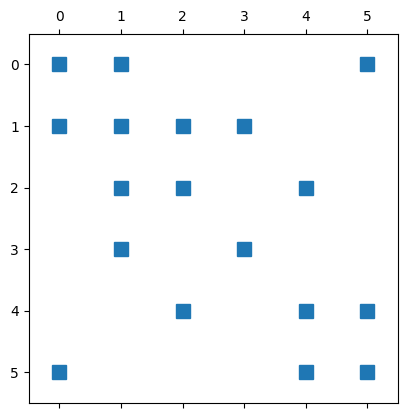

Graph nodes [0, 1, 2, 3, 4, 5]
Graph edges [(0, 0), (0, 1), (0, 5), (1, 1), (1, 2), (1, 3), (2, 2), (2, 4), (3, 3), (4, 4), (4, 5), (5, 5)]


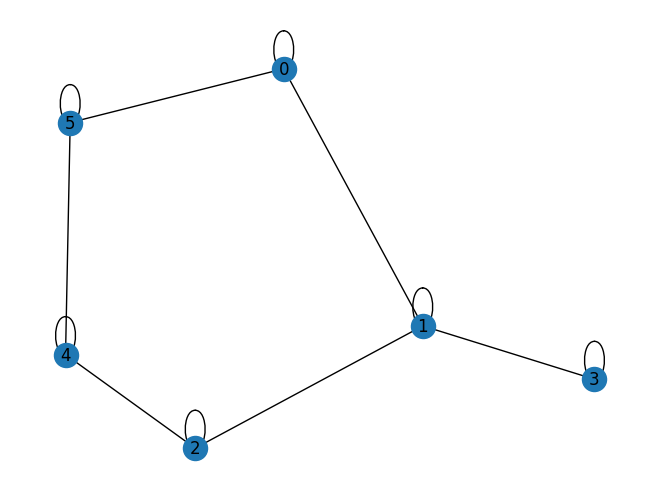

In [1]:
import numpy as np
import networkx as nx
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Create a sparse matrix
matrix = sp.csr_matrix([[1, 1, 0, 0,0,1], [1, 5, 2, 1,0,0], [0, 1, 1, 0,5,0], [0, 2, 0, 1,0,0],[0, 0, 3, 0,1,4],[1, 0, 0,0, 2,4]])

plt.spy(matrix)
plt.show()
# Convert the sparse matrix to a graph
graph = nx.from_scipy_sparse_array(matrix)
# Draw the graph
nx.draw(graph, with_labels=True)
print("Graph nodes", graph.nodes)
print("Graph edges", graph.edges)

plt.show()

1.1   Let the permutation vector p = [0, 5, 4, 2, 1, 3]. Show the adjacency graph and new pattern of the matrix B obtained by symmetrically permuting the original matrix according to the permutation vector p.


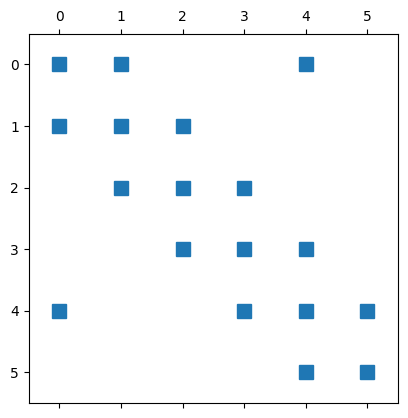

Graph nodes [0, 1, 2, 3, 4, 5]
Graph edges [(0, 0), (0, 1), (0, 5), (1, 1), (1, 2), (1, 3), (2, 2), (2, 4), (3, 3), (4, 4), (4, 5), (5, 5)]


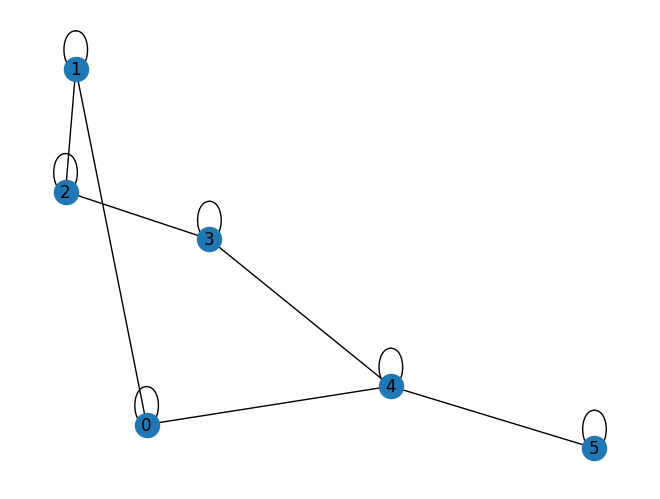

In [2]:
# Complete the code below
# define the permutation vector as a numpy arrary
p = [0,5,4,2,1,3]
# In scipy.sparse module, if you want to permute both rows and columns of a spase matrix,
# you have to apply these operations in two steps
B0 = matrix[:,p]
B =  B0[p,:]


plt.spy(B)
plt.show()
# Convert the sparse matrix to a graph
graph2 = nx.from_scipy_sparse_array(B)
# Draw the graph
nx.draw(graph2, with_labels=True)
print("Graph nodes", graph.nodes)
print("Graph edges", graph.edges)

plt.show()

1.2   Find all fill-ins generated by Gaussian elimination on the matrix B based on the graph model without computing the LU factorization.


Your answer: First, we remove the `0` node, which causes fill in between `1` and `4`. Then when removing `1`, we have more fill in between `2` and `4`. It is straightforward to see based on the structure of the graph at this point, there will be no more fill-in as there are no more fill paths (Rose-Tarjan). This means that the matrix form of the filled graph will be:

\begin{align}
\mathbf{B}^F &= \begin{pmatrix}
\ast & \ast & & & \ast  & \\
\ast & \ast &\ast & &\bullet & \\
 &\ast &\ast & \ast & \bullet& \\
 & & \ast& \ast& \ast & \\
\ast & \bullet& \bullet&\ast &\ast &\ast \\
 & & & & \ast&\ast \\
\end{pmatrix},
\end{align}

where the "$\ast$"-symbol represented an entry in the original graph and "$\bullet$"-symbol represents fill in corresponding to Gaussian Elimination.

1.3  Find the [Cuthill-McKee Algorithm](https://en.wikipedia.org/wiki/Cuthill%E2%80%93McKee_algorithm) for B (Start at node 0. For tie
breaking assume that adjacency lists are sorted increasingly). Pay attention to the ordering for the nodes in the same level.


Assume `0` is the node at level 0. Then the next level would be nodes `1` and `4`, which is in that order as we are told to order increasingly. This means the last level would be nodes `2`, `5`, and `3`. Notice since `1`>`4` from the first step `2` > `5`,`3`, where ">" is read "takes precedence over". Lastly, node `5` comes before `3` since $\deg$(`5`)$ = 1 < 2 = \deg($`3`), and we sort nodes in increasing degree order. This means the CM ordering would be `0`|`1`,`4`|`2`,`5`,`3`.

Graph nodes [0, 1, 2, 3, 4, 5]
Graph edges [(0, 0), (0, 1), (0, 5), (1, 1), (1, 2), (1, 3), (2, 2), (2, 4), (3, 3), (4, 4), (4, 5), (5, 5)]


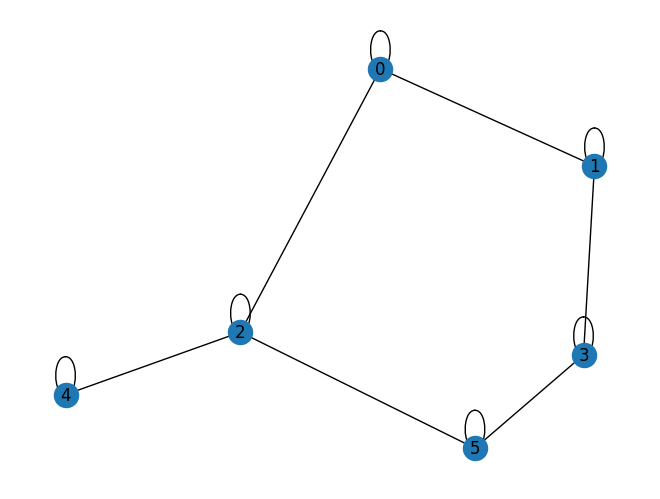

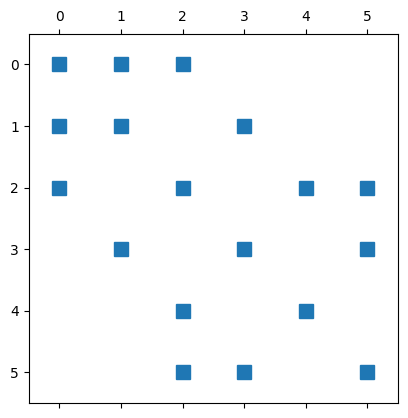

In [3]:
# define your permutation vector p based on the CM ordering.
p = [0,1,4,2,5,3]

# Show the adjaceny graph
CM0 = B[:,p]
CM =  CM0[p,:]

graphCM = nx.from_scipy_sparse_array(CM)

# Draw the graph
nx.draw(graphCM, with_labels=True)
print("Graph nodes", graph.nodes)
print("Graph edges", graph.edges)
plt.show()

# Show the sparsity of the corresponding reordered matrix
plt.spy(CM)
plt.show()

1.4  Find its reverse Cuthill McKee ordering and show the adjacency graph as well as the corresponding reordered matrix.

Since the RCM ordering is just the reverse of the CM ordering, we simply invert the string we found above to get the RCM ordering.


Graph nodes [0, 1, 2, 3, 4, 5]
Graph edges [(0, 0), (0, 1), (0, 5), (1, 1), (1, 2), (1, 3), (2, 2), (2, 4), (3, 3), (4, 4), (4, 5), (5, 5)]


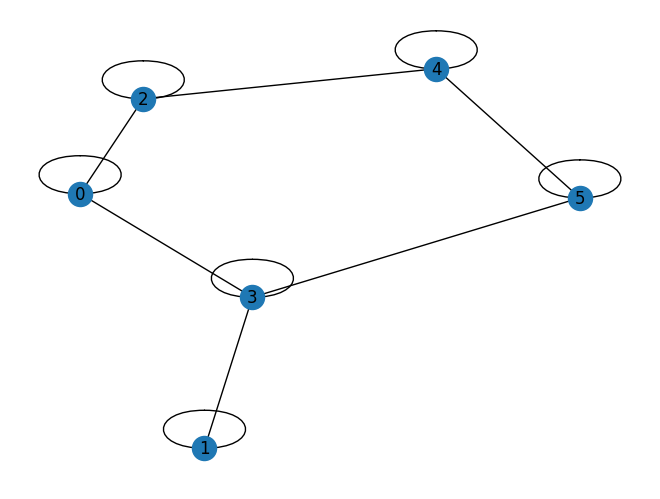

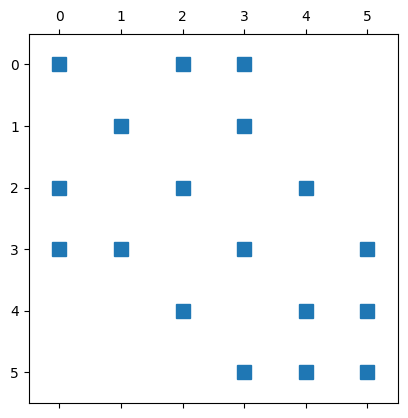

In [5]:
# define your permutation vector p based on the RCM ordering.
p = [3,5,2,4,1,0]

# Show the adjaceny graph
RCM0 = B[:,p]
RCM =  RCM0[p,:]

graphRCM = nx.from_scipy_sparse_array(RCM)

# Draw the graph
nx.draw(graphRCM, with_labels=True)
print("Graph nodes", graph.nodes)
print("Graph edges", graph.edges)
plt.show()

# Show the sparsity of the corresponding reordered matrix
plt.spy(RCM)
plt.show()

1.5 Use the implementation of RCM from scipy.sparse module to find the permutation vector p2. Compare this p2 with the p you obtained from 1.4. Are they the same? If not, why?

From the code below, we see the scipy.sparse implementation of RCM gives $p_2 = [1,2,0,3,4,5]$. This is different from what we arrived at which was $p = [0,1,4,2,5,3]$, but this is due to using a different root and different ordering. If we would have done the above procedure on root 1 and put precedence on the larger node label, i.e. `2`>`0`, then we would have arrived at the same as them. They probably have a very good reason for doing this, like creating a tree with one child per parent, which works better on more difficult problems

In [10]:
from scipy.sparse.csgraph import reverse_cuthill_mckee
p2 = reverse_cuthill_mckee(B)

print('p2 =', p2)

p2 = [1 2 0 3 4 5]


# Problem 2 (30pts). In this problem, we will test built-in reordering methods for sparse Gaussian elimination and learn the limitations of sparse Gaussian elimination.

In [11]:
# Generate the discretized matrix
import numpy as np
from scipy.sparse import diags, eye, kron

def tridiag(a, b, c, n):
    # Create a tridiagonal matrix
    return diags([a*np.ones(n-1), b*np.ones(n), c*np.ones(n-1)], [-1, 0, 1], format='csr')

def fd3d(nx, ny, nz, alpx, alpy, alpz, dshift):
    # Create tridiagonal matrices tx, ty, tz
    tx = tridiag(-1+alpx, 2, -1-alpx, nx)
    ty = tridiag(-1+alpy, 2, -1-alpy, ny)
    tz = tridiag(-1+alpz, 2, -1-alpz, nz)

    # Compute A using Kronecker products
    A = kron(eye(ny), tx) + kron(ty, eye(nx))
    if nz > 1:
        A = kron(eye(nz), A) + kron(tz, eye(nx*ny))

    # Subtract dshift times identity matrix from A
    A -= dshift * eye(nx*ny*nz)

    return A

1.1 Generate three matrices of size 10,000*10,000.

In [15]:
from scipy.sparse.linalg import splu

In [16]:
A1 = fd3d(10000,1,1,0,0,0,0)

In [17]:
A2 = fd3d(100,100,1,0,0,0,0)

In [18]:
A3 = fd3d(100,10,10,0,0,0,0)

In [19]:
%%time
lu = splu(A1,'NATURAL')
print(lu.nnz)

40088
CPU times: user 1.76 ms, sys: 1.51 ms, total: 3.27 ms
Wall time: 4.04 ms


<timed exec>:1: SparseEfficiencyWarning: splu converted its input to CSC format


In [20]:
%%time
lu = splu(A2,'NATURAL')
print(lu.nnz)

2000378
CPU times: user 61.6 ms, sys: 3.38 ms, total: 65 ms
Wall time: 64.4 ms


<timed exec>:1: SparseEfficiencyWarning: splu converted its input to CSC format


In [21]:
%%time
lu = splu(A3,'NATURAL')
print(lu.nnz)

<timed exec>:1: SparseEfficiencyWarning: splu converted its input to CSC format


18200468
CPU times: user 11.9 s, sys: 391 ms, total: 12.3 s
Wall time: 6.22 s


When you employ sparse Gaussian elimination to factorize these three matrices, you will likely observe a significant disparity in computational time required for each. Could you elucidate the reasons behind this variance? Please also plot the sparsity patterns of A1, A2, A3 and their LU factors. What have you observed?![solution.png](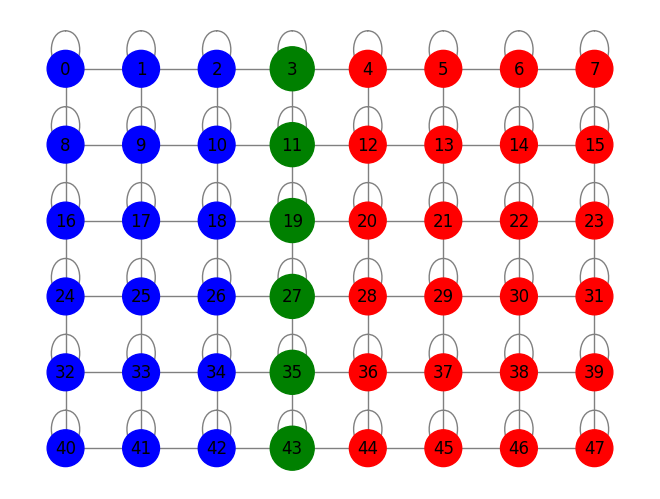![solution.png](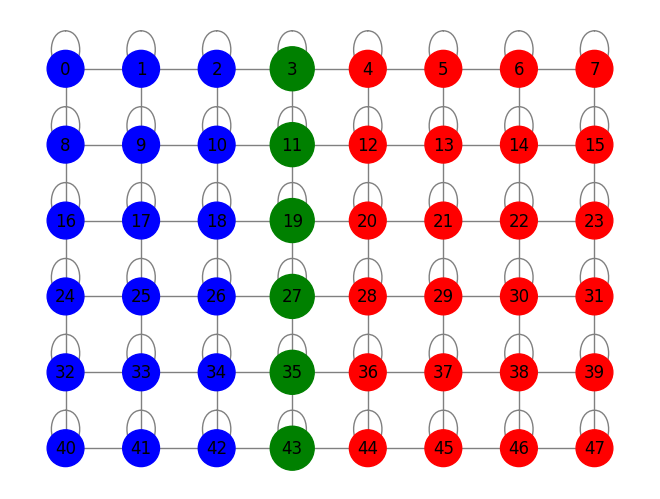![solution.png](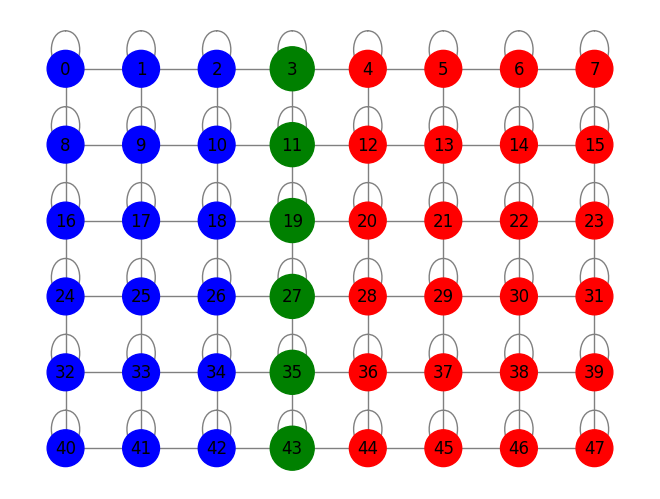![solution.png](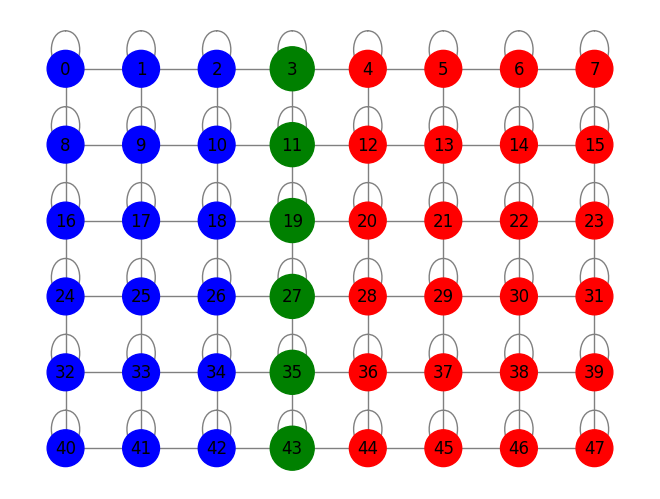![solution.png](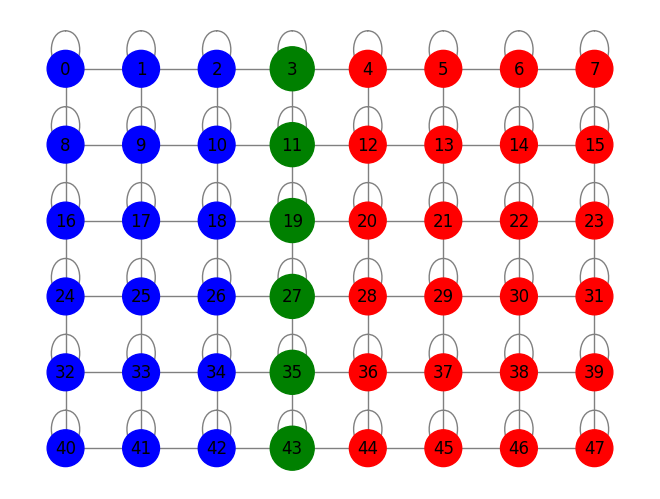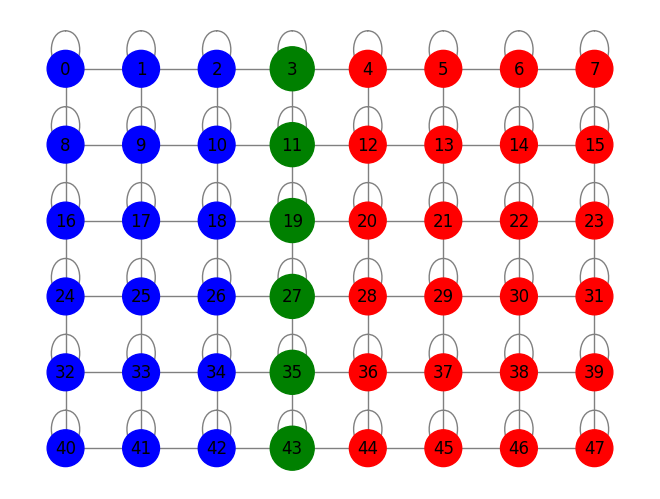)))))

Your answer:

1.2  Please read the document of scipy.sparse.splu and change the second input with three different options to make the code run faster for factoring the matrix A4 = fd3d(30,30,30,0,0,0,0). Plot the sparsity pattern of three diffrent LU factors. What is your observation in this case?

In [ ]:
# Write your code here


#Problem 3 (40pts) In this problem, we try to implement a nested dissection ordering based on metis pacakge.

In [12]:
!sudo apt-get install -y metis

Password:
sudo: a password is required


In [13]:
!pip install metis


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
def sparse_matrix_to_graph(sparse_matrix):
    """Convert a scipy sparse matrix to a networkx graph."""
    G = nx.Graph()
    G.add_nodes_from(range(sparse_matrix.shape[0]))
    cx = sparse_matrix.tocoo()
    for i, j, v in zip(cx.row, cx.col, cx.data):
        # Add each edge once
        if i <= j:
            G.add_edge(i, j, weight=v)
    return G

In [181]:
nnx = 8
nny = 6

In [182]:
A = fd3d(nnx,nny,1,0,0,0,0)

Nested Dissection Ordering: [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]


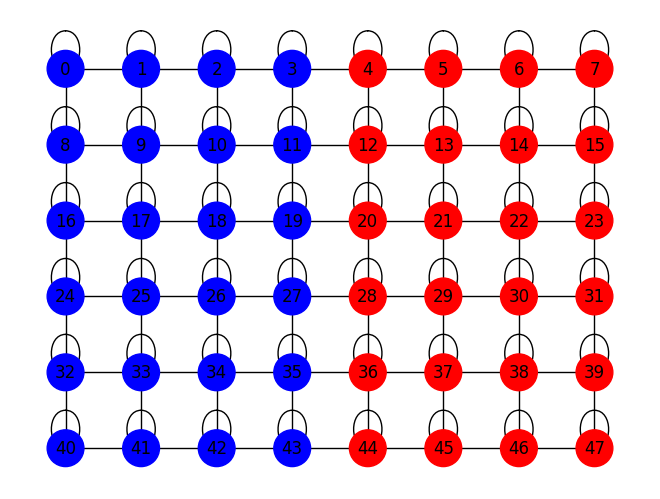

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


In [183]:
import metis
import networkx as nx
import matplotlib.pyplot as plt

# Convert the sparse matrix to an adjacency graph
G = sparse_matrix_to_graph(A)


# Apply nested dissection ordering
_, parts = metis.part_graph(G, 2)
print("Nested Dissection Ordering:", parts)

# Assign colors to nodes based on their partition
colors = ['red' if part == 0 else 'blue' for part in parts]

# Grid size
grid_width, grid_height = nnx, nny

# Generate grid positions for a nnx*nny grid
pos = {node: (node % grid_width, 1-node // grid_width) for node in G.nodes()}


# Draw the graph using the grid positions
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=700)
plt.show()
print(G.nodes)

3.1 It's important to recognize that the Metis package is primarily designed for partitioning a graph into two subgraphs of approximately equal size. Based on the figure provided, please identify a separator—a set of nodes—that effectively divides the red nodes from the blue nodes. Ensure that your chosen separator comprises the minimal number of nodes possible and the two disconnected subgraphs have roughly the same number of nodes.

Your answer:

3.2 Please read the following code first. Then modify this code so that the new code generate the following seperator



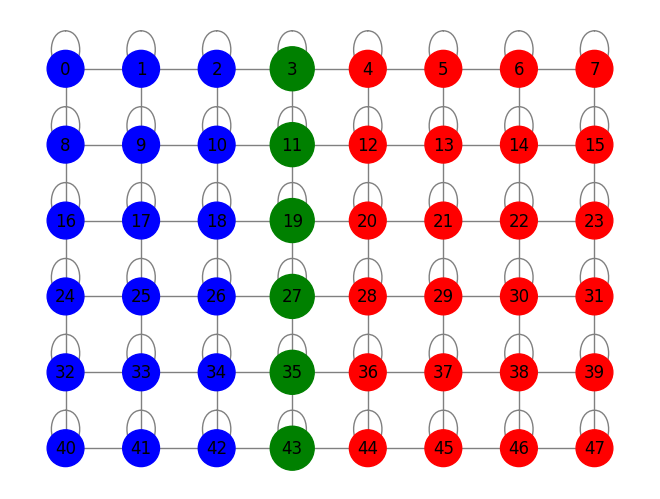

In [189]:
from IPython.display import Image, display

display(Image('solution.png')) # Replace 'uploaded_file_name.jpg' with the actual file name.

In [190]:
def sparse_matrix_to_graph(sparse_matrix):
    """Convert a scipy sparse matrix to a networkx graph."""
    G = nx.Graph()
    G.add_nodes_from(range(sparse_matrix.shape[0]))
    cx = sparse_matrix.tocoo()
    for i, j, v in zip(cx.row, cx.col, cx.data):
        # Add each edge once
        if i <= j:
            G.add_edge(i, j, weight=v)
    return G

def find_separator(G):
    """Partition the graph and identify the separator nodes, ensuring separator nodes are not in part_1 or part_2."""
    # Partition the graph into two parts
    edgecuts, parts = metis.part_graph(G, 2)

    # Initially identify nodes in each part
    initial_part_1 = [node for node in G.nodes() if parts[node] == 0]
    initial_part_2 = [node for node in G.nodes() if parts[node] == 1]

    # Identify separator nodes: nodes with edges that cross the partition
    separator = set()
    for edge in G.edges():
        if parts[edge[0]] != parts[edge[1]]:
            if(parts[edge[0]] == 0):
                separator.add(edge[0])
            else:
              separator.add(edge[1])

    # Remove separator nodes from initial_part_1 and initial_part_2
    part_1 = [node for node in initial_part_1 if node not in separator]
    part_2 = [node for node in initial_part_2 if node not in separator]

    return part_1, part_2, list(separator)



# Convert the sparse matrix to a graph
G2 = sparse_matrix_to_graph(A)

# Find the separator
part_1, part_2, separator = find_separator(G2)
print("Part 1:", part_1)
print("Part 2:", part_2)
print("Separator:", separator)
print(G2.nodes)

Part 1: [5, 6, 7, 13, 14, 15, 21, 22, 23, 29, 30, 31, 37, 38, 39, 45, 46, 47]
Part 2: [0, 1, 2, 3, 8, 9, 10, 11, 16, 17, 18, 19, 24, 25, 26, 27, 32, 33, 34, 35, 40, 41, 42, 43]
Separator: [4, 36, 12, 44, 20, 28]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]


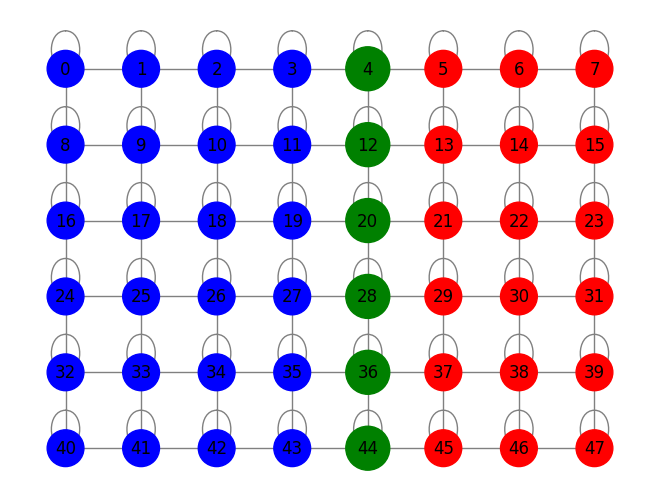

In [191]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming G2 is your graph, and part_1, part_2, and separator lists are defined

# Grid size
grid_width, grid_height = nnx, nny

# Generate grid positions for a nnx*nny grid
pos = {node: (node % grid_width, 1-node // grid_width) for node in G.nodes()}

# Assign colors and sizes based on node roles: part_1, part_2, and separator
colors = ['red' if node in part_1 else 'blue' if node in part_2 else 'green' for node in G.nodes()]
sizes = [700 if node not in separator else 1000 for node in G.nodes()]  # Larger size for separator nodes

# Draw the graph maintaining the grid topology
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=sizes, edge_color='gray')

plt.show()

In [ ]:
# Please write your code here:

def my_find_separator(G):

  xxxxx

In [ ]:
# Make sure to test your new code with the following Virilization code

# Find the separator
part_1, part_2, separator = my_find_separator(G2)
print("Part 1:", part_1)
print("Part 2:", part_2)
print("Separator:", separator)
print(G2.nodes)

# Grid size
grid_width, grid_height = nnx, nny

# Generate grid positions for a nnx*nny grid
pos = {node: (node % grid_width, 1-node // grid_width) for node in G.nodes()}

# Assign colors and sizes based on node roles: part_1, part_2, and separator
colors = ['red' if node in part_1 else 'blue' if node in part_2 else 'green' for node in G.nodes()]
sizes = [700 if node not in separator else 1000 for node in G.nodes()]  # Larger size for separator nodes

# Draw the graph maintaining the grid topology
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=sizes, edge_color='gray')

plt.show()

1.3 In the nested dissection code, do you prefer a short seperator or a long seperator? Please justify your choice.

Your answer:

1.4 You do not have to write the code for this problem. Just describe the basic idea. If you have the code to find the seperator for a graph. How do you plan to use this code to implement a nested dissection ordering for a general symmetric sparse matrix A.

Your answer: